In [2]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *
#import cirq
from ibm_quantum_widgets import *
from qiskit.quantum_info import Statevector,Operator, Pauli ,StabilizerState
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [36]:
#n=4
#qr1 = QuantumRegister(n)
#cr1 = ClassicalRegister(n)
#qc1 = QuantumCircuit(qr1,cr1)
#for i in range(n):
#    qc1.h(qr1[i])
#qc1.cz(qr1[3],qr1[2])
#qc1.cz(qr1[2],qr1[1])
#qc1.cz(qr1[2],qr1[0])

def stabilizer (quantumcir):
    from qiskit.quantum_info import StabilizerState
    stab = StabilizerState(quantumcir)
    p=str(stab)
    q=p.replace("StabilizerState(StabilizerTable: ","")
    #q=q.replace("""+""","")
    q= q.replace("""'""","")
    q =q.replace("""])""","")
    q = q.replace("""[""","")
    q = q.replace(""",""","")
    li = list(q.split(" "))
    return li

# for X error
def parity_check_X(list1):
    length =len(list1)
    parity_list_X =[]
    #print(len(list1),length)
    for i in range(1,length+1):
        #count = list1[i-1][0]
        for j in range(length): 
               
                if list1[j][i] =='Z' or list1[j][i]=='Y':
                
                #print(count+1)
                    parity_list_X.append(int('0'))
                else:
                    parity_list_X.append(int('1'))
        
    return np.array(parity_list_X,dtype=int).reshape(length, length)

#Creating Parity check Matrix for Z error
def parity_check_Z(list1):
    length =len(list1)
    parity_list_Z =[]
    #print(len(list1),length)
    for i in range(1,length+1):
        #count = list1[i-1][0]
        for j in range(length): 
                
                if list1[j][i] =='X' or list1[j][i]=='Y':
                
                #print(count+1)
                    parity_list_Z.append(int('0'))
                else:
                    parity_list_Z.append(int('1'))
        
    return np.array(parity_list_Z,dtype=int).reshape(length, length)

#Creating Parity check Matrix for Y error
def parity_check_Y(list1):
    length =len(list1)
    parity_list_Y =[]
    #print(len(list1),length)
    for i in range(1,length+1):
        #count = list1[i-1][0]
        for j in range(length): 
                
                if list1[j][i] =='X' or list1[j][i]=='Z':
                
                #print(count+1)
                    parity_list_Y.append(int('0'))
                else:
                    parity_list_Y.append(int('1'))
        
    return np.array(parity_list_Y,dtype=int).reshape(length, length)    


# Validity of code 
def check_code(list_x_p,list_y_p,list_z_p):
    
    count = 0
    length = len(list_x_p)
    
#Check for individual error 
    temp_x=True
    temp_y=True
    temp_z=True
    
    for ii in range (length):
        x1 = list(list_x_p[ii])
        y1 = list(list_y_p[ii])
        z1 = list(list_z_p[ii])
        
        for jj in range(length-ii-1 ):
            x2=list(list_x_p[length-1-jj])
            y2=list(list_y_p[length-1-jj])
            z2=list(list_z_p[length-1-jj])
            
            if x1 == x2 and temp_x == True:
                print("This Code cannot correct X error: Parity line",ii,"and parity line",length-jj-1,"is same")
                temp_x = False;
            
            if y1 == y2 and temp_y == True:
                print("This Code cannot correct Y error: Parity line",ii,"and parity line",length-jj-1,"is same")
                temp_y = False;
            
            if z1 == z2 and temp_z == True:
                print("This Code cannot correct Z error: Parity line",ii,"and parity line",length-jj-1,"is same")
                temp_z = False;
    
    if temp_x == True :
        print("INDIVIDUALLY This code can corect X error ")
    if temp_z == True:
        print("INDIVIDUALLY This code can corect Z error")
    if temp_y == True:
        print("INDIVIDUALLY This code can corect Y error")    
    
# Check for all the errors
    if temp_x == True and temp_y==True and temp_z==True :
        for i in range(length):
            x1 = list(list_x_p[i])
            y1 = list(list_y_p[i])
            z1 = list(list_z_p[i])
            for j in range(length):
                x2= list(list_x_p[j])
                y2 = list(list_y_p[j])
                z2 = list(list_z_p[j])
            #print(y2,z2)
            #print(z2.all())
            
                if x1 == y2:
                #print(x1.all(),y2.all())
                    return ("Hard luck This is not perfect code , Parities are same!!! line ",i+1,"in X and line ",j+1,"Y")
                elif x1 == z2: 
                    return("Hard luck This is not perfect code , Parities are same!!! line ",i+1,"in X and line ",j+1,"Z")
                elif y1 == z2:
                    return("Hard luck This is not perfect code , Parities are same!!! line ",i+1,"in Y and line ",j+1,"Z")
            
        return(" Congratulation!! A PERFECT QUANTUM CODE")
    return (None)             
#Stabilizer_code = stabilizer(qc1)
#parity_X = parity_check_X(Stabilizer_code)
#parity_Z = parity_check_Z(Stabilizer_code)
#parity_Y = parity_check_Y(Stabilizer_code)

#print("Stabilizers are ", Stabilizer_code)
#print("---------------------------------")
#print("Parity check matrix for X error\n",parity_X)
#print("---------------------------------")
#print("Parity check matrix for Z error\n",parity_Z)
#print("---------------------------------")
#print("Parity Check matrix for Y error\n",parity_Y)

# Congratulation!! A PERFECT QUANTUM CODE --- This means a single qubit error can be corrected if it corrupted by superposition of X, Y and Z

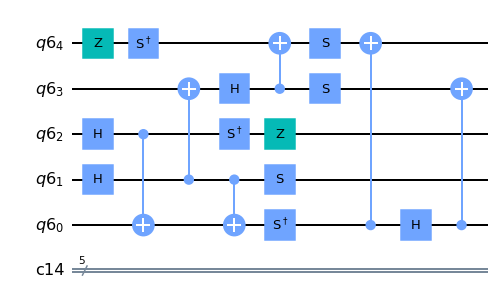

Stabilizers are  ['+IXZZX', '+XYIYX', '+XXYIY', '+YZIZY', '-ZYIIY']
---------------------------------
Parity check matrix for X error
 [[1 1 1 0 0]
 [1 0 1 0 0]
 [0 1 0 1 1]
 [0 0 1 0 1]
 [1 1 0 0 0]]
---------------------------------
Parity check matrix for Z error
 [[1 0 0 0 1]
 [0 0 0 1 0]
 [1 1 0 1 1]
 [1 0 1 1 1]
 [0 0 0 0 0]]
---------------------------------
Parity Check matrix for Y error
 [[1 0 0 1 0]
 [0 1 0 0 1]
 [0 1 1 1 1]
 [0 1 1 0 1]
 [0 0 1 1 1]]
---------------------------------
INDIVIDUALLY This code can corect X error 
INDIVIDUALLY This code can corect Z error
INDIVIDUALLY This code can corect Y error
 Congratulation!! A PERFECT QUANTUM CODE


In [52]:
# 5 qubit code

n=5
qr2 = QuantumRegister(n)
cr2 = ClassicalRegister(n)
qc2 = QuantumCircuit(qr2,cr2)
qc2.z(qr2[4])
qc2.sdg(qr2[4])
qc2.h(qr2[2])
qc2.h(qr2[1])
qc2.cx(qr2[2],qr2[0])
qc2.cx(qr2[1],qr2[3])
qc2.h(qr2[3])
qc2.cx(qr2[1],qr2[0])
qc2.cx(qr2[3],qr2[4])
qc2.sdg(qr2[2])
qc2.s(qr2[1])
qc2.sdg(qr2[0])
qc2.s(qr2[4])
qc2.s(qr2[3])
qc2.z(qr2[2])
qc2.cx(qr2[0],qr2[4])
qc2.h(qr2[0])
qc2.cx(qr2[0],qr2[3])
display(qc2.draw('mpl',reverse_bits=True))
Stabilizer_code_2 = stabilizer(qc2)
print("Stabilizers are ", Stabilizer_code_2)
parity_X_2 = parity_check_X(Stabilizer_code_2)
parity_Z_2 = parity_check_Z(Stabilizer_code_2)
parity_Y_2 = parity_check_Y(Stabilizer_code_2)


print("---------------------------------")
print("Parity check matrix for X error\n",parity_X_2)
print("---------------------------------")
print("Parity check matrix for Z error\n",parity_Z_2)
print("---------------------------------")
print("Parity Check matrix for Y error\n",parity_Y_2)
print("---------------------------------")
#print("Parity Check matrix for Y_test error\n",parity_Y_test)
final_check_2= check_code(parity_X_2,parity_Y_2,parity_Z_2)
print(final_check_2)

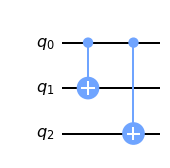

Stabilizers are  ['+IIZ', '+IZZ', '+ZIZ']
---------------------------------
Parity check matrix for X error
 [[1 1 0]
 [1 0 1]
 [0 0 0]]
---------------------------------
Parity check matrix for Z error
 [[1 1 1]
 [1 1 1]
 [1 1 1]]
---------------------------------
Parity Check matrix for Y error
 [[1 1 0]
 [1 0 1]
 [0 0 0]]
---------------------------------
This Code cannot correct Z error: Parity line 0 and parity line 2 is same
INDIVIDUALLY This code can corect X error 
INDIVIDUALLY This code can corect Y error


In [46]:
#Repetition Code 

qrr = QuantumCircuit(3)

qrr.cx(0,1)
qrr.cx(0,2)
display(qrr.draw('mpl'))
Stabilizer_code_rep = stabilizer(qrr)
print("Stabilizers are ", Stabilizer_code_rep)
parity_X_rep = parity_check_X(Stabilizer_code_rep)
parity_Z_rep = parity_check_Z(Stabilizer_code_rep)
parity_Y_rep = parity_check_Y(Stabilizer_code_rep)
print("---------------------------------")
print("Parity check matrix for X error\n",parity_X_rep)
print("---------------------------------")
print("Parity check matrix for Z error\n",parity_Z_rep)
print("---------------------------------")
print("Parity Check matrix for Y error\n",parity_Y_rep)
print("---------------------------------")
final_check_repetition= check_code(parity_X_rep,parity_Y_rep,parity_Z_rep)
final_check_repetition

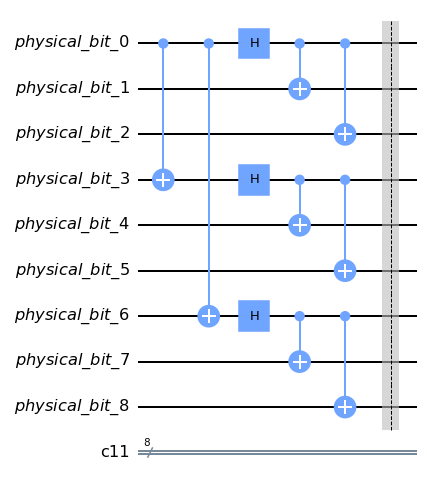

Stabilizers are  ['+IIIIIIXXX', '+IIIIIIIZZ', '+IIIIIIZIZ', '+IIIXXXXXX', '+IIIIZZIII', '+IIIZIZIII', '+XXXIIIXXX', '+IZZIIIIII', '+ZIZIIIIII']
---------------------------------
Parity check matrix for X error
 [[1 1 1 1 1 1 1 1 0]
 [1 1 1 1 1 1 1 0 1]
 [1 1 1 1 1 1 1 0 0]
 [1 1 1 1 1 0 1 1 1]
 [1 1 1 1 0 1 1 1 1]
 [1 1 1 1 0 0 1 1 1]
 [1 1 0 1 1 1 1 1 1]
 [1 0 1 1 1 1 1 1 1]
 [1 0 0 1 1 1 1 1 1]]
---------------------------------
Parity check matrix for Z error
 [[1 1 1 1 1 1 0 1 1]
 [1 1 1 1 1 1 0 1 1]
 [1 1 1 1 1 1 0 1 1]
 [1 1 1 0 1 1 1 1 1]
 [1 1 1 0 1 1 1 1 1]
 [1 1 1 0 1 1 1 1 1]
 [0 1 1 0 1 1 0 1 1]
 [0 1 1 0 1 1 0 1 1]
 [0 1 1 0 1 1 0 1 1]]
---------------------------------
Parity Check matrix for Y error
 [[1 1 1 1 1 1 0 1 0]
 [1 1 1 1 1 1 0 0 1]
 [1 1 1 1 1 1 0 0 0]
 [1 1 1 0 1 0 1 1 1]
 [1 1 1 0 0 1 1 1 1]
 [1 1 1 0 0 0 1 1 1]
 [0 1 0 0 1 1 0 1 1]
 [0 0 1 0 1 1 0 1 1]
 [0 0 0 0 1 1 0 1 1]]
---------------------------------
This Code cannot correct Z error: Parity line 0 and

In [47]:
# Shor 9 qubit code 

qr = QuantumRegister(9,'physical_bit')
#ar = QuantumRegister(8,'ancilla_bit')
cr = ClassicalRegister(8)

shor_ecc=QuantumCircuit(qr,cr)

#Encoding begins

shor_ecc.cx(qr[0],qr[3])
shor_ecc.cx(qr[0],qr[6])
shor_ecc.h(qr[:7:3])
for i in range(0,9,3):
    shor_ecc.cx(qr[i],qr[i+1])
    shor_ecc.cx(qr[i],qr[i+2])
    
#Encoding ends

#shor_ecc.h(ar)
shor_ecc.barrier()
display(shor_ecc.draw('mpl'))

Stabilizer_code_shor = stabilizer(shor_ecc)
print("Stabilizers are ", Stabilizer_code_shor)
parity_X_shor = parity_check_X(Stabilizer_code_shor)
parity_Z_shor = parity_check_Z(Stabilizer_code_shor)
parity_Y_shor = parity_check_Y(Stabilizer_code_shor)
print("---------------------------------")
print("Parity check matrix for X error\n",parity_X_shor)
print("---------------------------------")
print("Parity check matrix for Z error\n",parity_Z_shor)
print("---------------------------------")
print("Parity Check matrix for Y error\n",parity_Y_shor)
print("---------------------------------")
final_check_shor= check_code(parity_X_shor,parity_Y_shor,parity_Z_shor)

final_check_shor

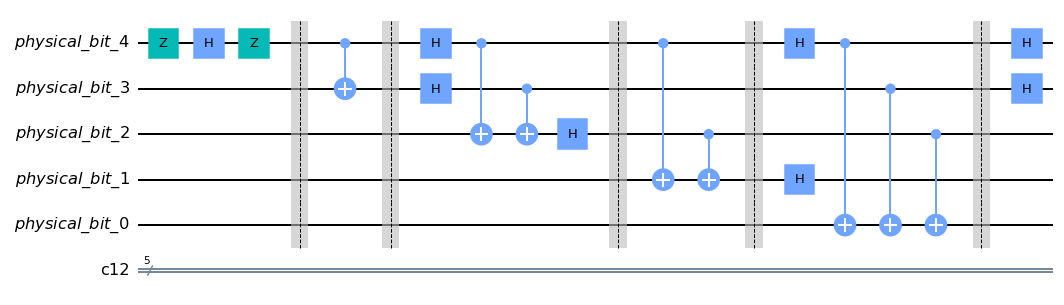

Stabilizers are  ['+XXZIZ', '+ZIZXX', '+ZXXZI', '+XZIZX', '-ZXIIX']
---------------------------------
Parity check matrix for X error
 [[1 0 0 1 0]
 [1 1 1 0 1]
 [0 0 1 1 1]
 [1 1 0 0 1]
 [0 1 1 1 1]]
---------------------------------
Parity check matrix for Z error
 [[0 1 1 0 1]
 [0 1 0 1 0]
 [1 1 0 1 1]
 [1 0 1 1 1]
 [1 0 1 0 0]]
---------------------------------
Parity Check matrix for Y error
 [[0 0 0 0 0]
 [0 1 0 0 0]
 [0 0 0 1 1]
 [1 0 0 0 1]
 [0 0 1 0 0]]
---------------------------------
INDIVIDUALLY This code can corect X error 
INDIVIDUALLY This code can corect Z error
INDIVIDUALLY This code can corect Y error


' Congratulation!! A PERFECT QUANTUM CODE'

In [48]:
qr = QuantumRegister(5,'physical_bit')
#ar = QuantumRegister(8,'ancilla_bit')
cr = ClassicalRegister(5)

f_qubit=QuantumCircuit(qr,cr)

f_qubit.z(qr[4])
f_qubit.h(qr[4])
f_qubit.z(qr[4])
f_qubit.barrier()
f_qubit.cx(qr[4],qr[3])
f_qubit.barrier()
f_qubit.h(qr[4])
f_qubit.h(qr[3])
f_qubit.cx(qr[4],qr[2])
f_qubit.cx(qr[3],qr[2])
f_qubit.h(qr[2])
f_qubit.barrier()
f_qubit.cx(qr[4],qr[1])
f_qubit.cx(qr[2],qr[1])
f_qubit.barrier()
f_qubit.h(qr[4])
f_qubit.h(qr[1])
f_qubit.cx(qr[4],qr[0])
f_qubit.cx(qr[3],qr[0])
f_qubit.cx(qr[2],qr[0])
f_qubit.barrier()
f_qubit.h(qr[4])
f_qubit.h(qr[3])
display(f_qubit.draw('mpl',reverse_bits=True))
Stabilizer_code_3 = stabilizer(f_qubit)
print("Stabilizers are ", Stabilizer_code_3)
parity_X_3 = parity_check_X(Stabilizer_code_3)
parity_Z_3 = parity_check_Z(Stabilizer_code_3)
parity_Y_3 = parity_check_Y(Stabilizer_code_3)
print("---------------------------------")
print("Parity check matrix for X error\n",parity_X_3)
print("---------------------------------")
print("Parity check matrix for Z error\n",parity_Z_3)
print("---------------------------------")
print("Parity Check matrix for Y error\n",parity_Y_3)
print("---------------------------------")
final_check_3= check_code(parity_X_3,parity_Y_3,parity_Z_3)
final_check_3

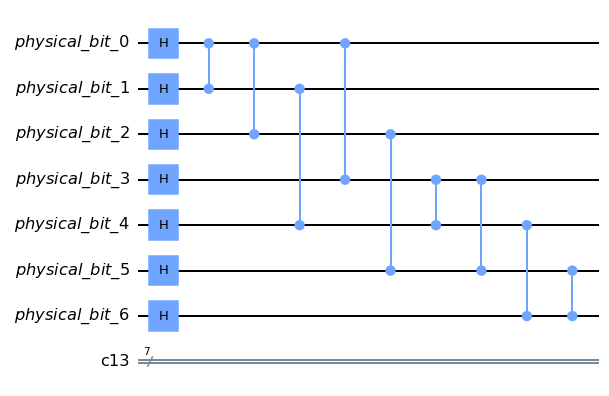

Stabilizers are  ['+IIIZZZX', '+IIZIIXZ', '+IZIIXIZ', '+IZZXIIZ', '+ZIXZIZI', '+ZXIZZII', '+XZZIIII']
---------------------------------
Parity check matrix for X error
 [[1 1 1 1 0 0 1]
 [1 1 0 0 1 1 0]
 [1 0 1 0 1 1 0]
 [0 1 1 1 0 0 1]
 [0 1 1 1 1 0 1]
 [0 1 1 1 0 1 1]
 [1 0 0 0 1 1 1]]
---------------------------------
Parity check matrix for Z error
 [[1 1 1 1 1 1 0]
 [1 1 1 1 1 0 1]
 [1 1 1 1 0 1 1]
 [1 1 1 0 1 1 1]
 [1 1 0 1 1 1 1]
 [1 0 1 1 1 1 1]
 [0 1 1 1 1 1 1]]
---------------------------------
Parity Check matrix for Y error
 [[1 1 1 1 0 0 0]
 [1 1 0 0 1 0 0]
 [1 0 1 0 0 1 0]
 [0 1 1 0 0 0 1]
 [0 1 0 1 1 0 1]
 [0 0 1 1 0 1 1]
 [0 0 0 0 1 1 1]]
---------------------------------
INDIVIDUALLY This code can corect X error 
INDIVIDUALLY This code can corect Z error
INDIVIDUALLY This code can corect Y error


' Congratulation!! A PERFECT QUANTUM CODE'

In [49]:
# 7 qubit steane code 
qr7 = QuantumRegister(7,'physical_bit')
#ar = QuantumRegister(8,'ancilla_bit')
cr7 = ClassicalRegister(7)

steane_cir=QuantumCircuit(qr7,cr7)
#steane_cir.x(qr7[5])
for i in range(7):
    steane_cir.h(qr7[i])
steane_cir.cz(qr7[0],qr7[1])
steane_cir.cz(qr7[0],qr7[2])
steane_cir.cz(qr7[0],qr7[3])
steane_cir.cz(qr7[1],qr7[4])
steane_cir.cz(qr7[2],qr7[5])
steane_cir.cz(qr7[3],qr7[4])
steane_cir.cz(qr7[3],qr7[5])
steane_cir.cz(qr7[4],qr7[6])
steane_cir.cz(qr7[5],qr7[6])
display(steane_cir.draw('mpl'))

Stabilizer_code_steane = stabilizer(steane_cir)
print("Stabilizers are ", Stabilizer_code_steane)
parity_X_steane = parity_check_X(Stabilizer_code_steane)
parity_Z_steane = parity_check_Z(Stabilizer_code_steane)
parity_Y_steane = parity_check_Y(Stabilizer_code_steane)
print("---------------------------------")
print("Parity check matrix for X error\n",parity_X_steane)
print("---------------------------------")
print("Parity check matrix for Z error\n",parity_Z_steane)
print("---------------------------------")
print("Parity Check matrix for Y error\n",parity_Y_steane)
print("---------------------------------")
final_check_steane= check_code(parity_X_steane,parity_Y_steane,parity_Z_steane)

final_check_steane

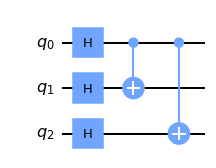

Stabilizers are  ['+XXX', '+IXI', '+XII']
---------------------------------
Parity check matrix for X error
 [[1 1 1]
 [1 1 1]
 [1 1 1]]
---------------------------------
Parity check matrix for Z error
 [[0 1 0]
 [0 0 1]
 [0 1 1]]
---------------------------------
Parity Check matrix for Y error
 [[0 1 0]
 [0 0 1]
 [0 1 1]]
---------------------------------
This Code cannot correct X error: Parity line 0 and parity line 2 is same
INDIVIDUALLY This code can corect Z error
INDIVIDUALLY This code can corect Y error


In [51]:
#Another Repetition code for Z correction 

qrr1 = QuantumCircuit(3)

for i in range (3):
    qrr1.h(i)
qrr1.cx(0,1)
qrr1.cx(0,2)

display(qrr1.draw('mpl'))
Stabilizer_code_rep_Z = stabilizer(qrr1)
print("Stabilizers are ", Stabilizer_code_rep_Z)
parity_X_rep_Z = parity_check_X(Stabilizer_code_rep_Z)
parity_Z_rep_Z = parity_check_Z(Stabilizer_code_rep_Z)
parity_Y_rep_Z = parity_check_Y(Stabilizer_code_rep_Z)
print("---------------------------------")
print("Parity check matrix for X error\n",parity_X_rep_Z)
print("---------------------------------")
print("Parity check matrix for Z error\n",parity_Z_rep_Z)
print("---------------------------------")
print("Parity Check matrix for Y error\n",parity_Y_rep_Z)
print("---------------------------------")
final_check_repetition_Z= check_code(parity_X_rep_Z,parity_Y_rep_Z,parity_Z_rep_Z)
final_check_repetition_Z